# FINM 25000 - Quantitative Portfolio Management and Algorithmic Trading
## Homework 1 Solution | Summer 2022

In [1]:
# import the packages we need
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns

## 2 Mean-Variance Optimization
### 1. Summary Statistics
#### (a) Calculate and display the mean and volatility of each asset's excess return. (Recall we use volatility to refer to standard deviation.)


In [2]:
# Return Data for Multi Assets ETF
data = pd.read_excel('multi_asset_etf_data.xlsx', sheet_name = 'excess returns').set_index('Date')

# Annualized Mean Return and Volatality
mean_vol_table = data.describe().loc[['mean','std']].transpose()
mean_vol_table['Annual_Mean'], mean_vol_table['Annual_Std']  = mean_vol_table['mean'] * 12, mean_vol_table['std'] * (12**0.5)
mean_vol_table[['Annual_Mean','Annual_Std']].style.format('{:,.2%}')

,Annual_Mean,Annual_Std
BWX,0.64%,7.65%
DBC,4.22%,18.11%
EEM,7.37%,19.32%
EFA,8.54%,16.04%
HYG,7.21%,8.57%
IEF,2.35%,5.86%
IYR,15.19%,18.28%
PSP,13.89%,21.72%
QAI,2.05%,4.84%
SPY,15.07%,14.20%


In [3]:
def mean_volatality_stat(data, date_index = True, annualize = 12):
    if(date_index == True):
        mean_vol_table = data.describe().loc[['mean','std']].transpose()
    if annualize:
        mean_vol_table['Annual_Mean'], mean_vol_table['Annual_Std']  = mean_vol_table['mean'] * annualize, mean_vol_table['std'] * np.sqrt(annualize)
        mean_vol_table['Sharpe Ratio'] = mean_vol_table['Annual_Mean'] / mean_vol_table['Annual_Std']
    return(mean_vol_table[['Annual_Mean','Annual_Std', 'Sharpe Ratio']])

display(mean_volatality_stat(data))

,Annual_Mean,Annual_Std,Sharpe Ratio
BWX,0.01,0.08,0.08
DBC,0.04,0.18,0.23
EEM,0.07,0.19,0.38
EFA,0.09,0.16,0.53
HYG,0.07,0.09,0.84
IEF,0.02,0.06,0.40
IYR,0.15,0.18,0.83
PSP,0.14,0.22,0.64
QAI,0.02,0.05,0.42
SPY,0.15,0.14,1.06


#### (b) Which assets have the best and worst Sharpe ratios?


In [4]:
# Calculating Sharpe Ratio
mean_vol_table['Sharpe_Ratio'] = mean_vol_table['Annual_Mean']/mean_vol_table['Annual_Std']
mean_vol_table_print = mean_vol_table.sort_values('Sharpe_Ratio', ascending = False)
print('Best Sharpe Ratio: '+ str(round(mean_vol_table_print.iloc[[0]].Sharpe_Ratio[0], 2)) + ' for ' + mean_vol_table_print.iloc[[0]].index[0])
print('Worst Sharpe Ratio: '+ str(round(mean_vol_table_print.iloc[[-1]].Sharpe_Ratio[0], 2)) + ' for ' + mean_vol_table_print.iloc[[-1]].index[0])
mean_vol_table_print['Sharpe_Ratio']

Best Sharpe Ratio: 1.06 for SPY
Worst Sharpe Ratio: 0.08 for BWX


SPY   1.06
HYG   0.84
IYR   0.83
TIP   0.70
PSP   0.64
EFA   0.53
QAI   0.42
IEF   0.40
EEM   0.38
DBC   0.23
BWX   0.08
Name: Sharpe_Ratio, dtype: float64

### 2. Descriptive Analysis
#### (a) Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?

**** Correlation Matrix ****


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.00,0.33,0.61,0.56,0.51,0.32,0.39,0.49,0.62,0.40,0.55
DBC,0.33,1.00,0.56,0.58,0.47,-0.41,0.29,0.49,0.54,0.50,0.08
EEM,0.61,0.56,1.00,0.85,0.75,-0.25,0.60,0.80,0.80,0.75,0.23
EFA,0.56,0.58,0.85,1.00,0.76,-0.31,0.67,0.91,0.83,0.87,0.16
HYG,0.51,0.47,0.75,0.76,1.00,-0.16,0.74,0.81,0.75,0.74,0.24
IEF,0.32,-0.41,-0.25,-0.31,-0.16,1.00,-0.06,-0.30,-0.09,-0.33,0.66
IYR,0.39,0.29,0.60,0.67,0.74,-0.06,1.00,0.74,0.61,0.73,0.29
PSP,0.49,0.49,0.80,0.91,0.81,-0.30,0.74,1.00,0.82,0.90,0.18
QAI,0.62,0.54,0.80,0.83,0.75,-0.09,0.61,0.82,1.00,0.83,0.37
SPY,0.40,0.50,0.75,0.87,0.74,-0.33,0.73,0.90,0.83,1.00,0.14


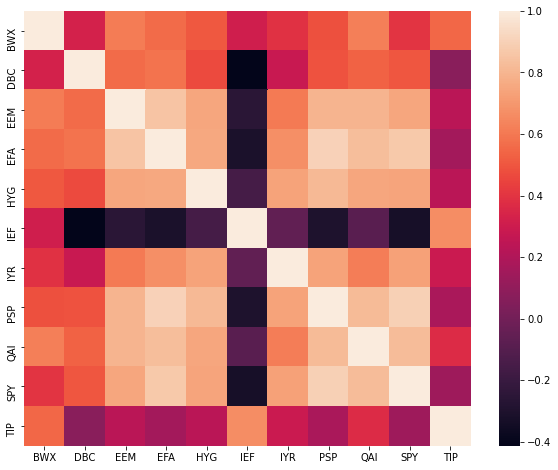

Pair of securities with highest correlation: ('EFA', 'PSP')
Pair of securities with lowest correlation: ('IEF', 'IYR')


In [5]:
# Correlation Matrix
corrmat = data.corr()
print('**** Correlation Matrix ****')
display(corrmat)

#Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corrmat)
plt.show()

#Removing Diagonal Elements which are always 1 
corrmat[corrmat==1] = None

#Melting the dataframe and sorting on values 
corr_rank = abs(corrmat.unstack()).sort_values(ascending = False).dropna()

#Highest and Lowest Correls 
print('Pair of securities with highest correlation: ' + str(corr_rank.index[1]))
print('Pair of securities with lowest correlation: ' + str(corr_rank.index[-1]))

#### (b) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?

In [6]:
# then find the SR of the 3 assets using their symbols
mean_vol_table_print[['Annual_Mean','Sharpe_Ratio']].loc[['TIP','BWX','IEF']]

,Annual_Mean,Sharpe_Ratio
TIP,0.03,0.70
BWX,0.01,0.08
IEF,0.02,0.40


Looking at the numbers above, it is clear that TIPS has:
1. The fourth highest Sharpe Ratio out of the 11 assets available in the sample. 
2. Better Sharpe Ratio than Domestic and International Government Bonds
3. Poor performance as compared to Equity, HY Corporate Bonds and Real Estate

#### (c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

Scrolling up and looking at the correlation matrix heatmap again, we can see that the corrleation between TIPS and the rest of the assets in the portfolio are low (colors mostly dark). Also, given that TIPS has a higher Sharpe ratio than the average SR of the portfolio, Harvard **should** consider TIPS as a separate asset.

### 3. The MV frontier.
#### (a) Compute and display the weights of the tangency portfolios: $w^{tan}$.

In [7]:
### Function for Tangency Portfolio

def tangency_portfolio(data, return_vector, inverse_covmat):
    one_vector = np.ones((11,1), dtype = int)
    return np.dot(inverse_covmat, return_vector) / float(np.dot(np.dot(one_vector.transpose(), inverse_covmat), return_vector))

#return_vector = vector of annualized mean returns 
return_vector = np.array(mean_vol_table['Annual_Mean']).reshape([11,1])

#inverse_covmat = inverse of covariance matrix
covmat = data.cov()*12
inverse_covmat = np.linalg.inv(np.array(covmat))

#Tangency Portfolio Weights Vector
tangency_portfolio_weights = tangency_portfolio(data, return_vector, inverse_covmat)
pd.DataFrame(tangency_portfolio_weights, index = mean_vol_table.index, columns = ['Weights for the Tangency Portfolio']).sort_values('Weights for the Tangency Portfolio', ascending = False).style.format('{:,.2%}')

,Weights for the Tangency Portfolio
SPY,234.85%
IEF,215.71%
HYG,130.83%
TIP,94.95%
DBC,19.17%
EEM,12.84%
EFA,-0.72%
IYR,-36.88%
PSP,-39.91%
BWX,-97.31%


#### (b) Compute the mean, volatility, and Sharpe Ratio for the tangency portfolio corresponding to $w^{tan}$.

In [8]:
# Mean, Volatality and Sharpe Ratio for the tangency portfolio:
mean = np.dot(tangency_portfolio_weights.transpose(), return_vector)
volatality = np.dot(np.dot(tangency_portfolio_weights.transpose(), covmat), tangency_portfolio_weights) ** 0.5

print(f'Mean Return of Tangency Portfolio = {round(float(mean)*100, 2)}%')
print(f'Volatality of Tangency Portfolio = {round(float(volatality)*100, 2)}%')
print(f'Sharpe Ratio of Tangency Portfolio = {round(float(mean/volatality), 2)}')

Mean Return of Tangency Portfolio = 33.96%
Volatality of Tangency Portfolio = 16.53%
Sharpe Ratio of Tangency Portfolio = 2.05


### 4. The allocation.
#### (a) Compute and display the weights of MV portfolios with target returns of $\tilde{\mu}^p = .01$.

In [9]:
# Allocation to tangency portfolio
def tangency_portfolio_allocation(data, return_vector, inverse_covmat, target_return = 0.01*12):
    one_vector = np.ones((11,1), dtype = int)
    return (np.dot(np.dot(one_vector.transpose(), inverse_covmat), return_vector) / np.dot(np.dot(return_vector.transpose(), inverse_covmat), return_vector)) * target_return

portfolio_weights = tangency_portfolio_weights * tangency_portfolio_allocation(data, return_vector, inverse_covmat, target_return = 0.01*12)
pd.DataFrame(portfolio_weights, index = mean_vol_table.index, columns = ['Weights for the Target Portfolio']).sort_values('Weights for the Target Portfolio', ascending = False).style.format('{:,.2%}')

,Weights for the Target Portfolio
SPY,82.99%
IEF,76.22%
HYG,46.23%
TIP,33.55%
DBC,6.77%
EEM,4.54%
EFA,-0.26%
IYR,-13.03%
PSP,-14.10%
BWX,-34.38%


#### (b) What is the mean, volatility, and Sharpe ratio for $w^p$?

In [10]:
mean = np.dot(return_vector.transpose(), portfolio_weights)
volatality = np.dot(np.dot(portfolio_weights.transpose(), covmat), portfolio_weights) ** 0.5
print(f'Mean = {round(float(mean)*100, 2)}%')
print(f'Volatality = {round(float(volatality)*100, 2)}%')
print(f'Sharpe Ratio = {round(float(mean/volatality), 2)}')

Mean = 12.0%
Volatality = 5.84%
Sharpe Ratio = 2.05


#### (c) Discuss the allocation. In which assets is the portfolio most long? And short?

In [11]:
print('Portfolio is long on: '+ str(list(data.columns[np.where([portfolio_weights>0])[1]])))
print('Portfolio is short on: '+ str(list(data.columns[np.where([portfolio_weights<0])[1]])))

print('Portfolio is longest on: '+ str(list(data.columns[np.where([portfolio_weights == max(portfolio_weights)])[1]])))
print('Portfolio is shortest on: '+ str(list(data.columns[np.where([portfolio_weights == min(portfolio_weights)])[1]])))

Portfolio is long on: ['DBC', 'EEM', 'HYG', 'IEF', 'SPY', 'TIP']
Portfolio is short on: ['BWX', 'EFA', 'IYR', 'PSP', 'QAI']
Portfolio is longest on: ['SPY']
Portfolio is shortest on: ['QAI']


#### (d) Does this line up with which assets have the strongest Sharpe ratios?

No, the maximum Sharpe Ratio is SPY and lowest is BWX. This is because the allocation depends more on a combination of 
low covariances between the assets as well as their risk adjusted performance (Sharpe Ratio)

### 5. Simple Portfolios
#### (a) Calculate the performance of the equally-weighted portfolio over the sample. Rescale the entire weighting vector to have target mean $\tilde{w} = .01$. Report its mean, volatility, and Sharpe ratio.

In [12]:
#Equally Weighted Portfolio
equal_weight_vector = np.array([data.shape[1] ** -1] * data.shape[1])
mean_rescaler = 0.12/np.dot(return_vector.transpose(), equal_weight_vector)
equal_weight_vector_rescaled = equal_weight_vector * mean_rescaler

mean = np.dot(return_vector.transpose(), equal_weight_vector_rescaled)
volatality = np.dot(np.dot(equal_weight_vector_rescaled.transpose(), covmat), equal_weight_vector_rescaled) ** 0.5

print(f'Mean Return of the Equally Weighted Portfolio = {round(float(mean)*100, 2)}%')
print(f'Volatality of the Equally Weighted Portfolio = {round(float(volatality)*100, 2)}%')
print(f'Sharpe Ratio of the Equally Weighted Portfolio= {round(float(mean/volatality), 2)}')

Mean Return of the Equally Weighted Portfolio = 12.0%
Volatality of the Equally Weighted Portfolio = 16.26%
Sharpe Ratio of the Equally Weighted Portfolio= 0.74


#### (b) Calculate the performance of the "risk-parity" portfolio over the sample. Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample volatility estimate.
$
w^i = \frac{1}{\sigma_i}
$
This will give the weight vector, $w$, but you will need to rescale it to have a target mean of $\tilde{\mu} = .01$.

In [13]:
# Risk Parity Portfolio: For the Risk Averse
risk_parity_portfolio_vector = np.array(mean_vol_table['Annual_Std'])**-1
mean_rescaler = 0.12/np.dot(return_vector.transpose(), risk_parity_portfolio_vector)
risk_parity_portfolio_vector_rescaled = risk_parity_portfolio_vector * mean_rescaler

mean = np.dot(return_vector.transpose(), risk_parity_portfolio_vector_rescaled)
volatality = np.dot(np.dot(risk_parity_portfolio_vector_rescaled.transpose(), covmat), risk_parity_portfolio_vector_rescaled) ** 0.5

print(f'Mean return of risk parity portfolio = {round(float(mean)*100, 2)}%')
print(f'Volatality of risk parity portfolio = {round(float(volatality)*100, 2)}%')
print(f'Sharpe Ratio of risk parity portfolio = {round(float(mean/volatality), 2)}')

Mean return of risk parity portfolio = 12.0%
Volatality of risk parity portfolio = 15.25%
Sharpe Ratio of risk parity portfolio = 0.79


#### (c) How does these compare to the MV portfolio from problem 2.4?

Both, Equally-Weighted and Risk-Parity portfolios give similar returns to the MV portfolio.
However, since these portfolios, do not maximze Sharpe-Ratio, they have greater portfolio volatality 

### 6. Out-of-Sample Performance
Let's divide the sample to both compute a portfolio and then check its performance out of
sample.

#### (a) Using only data through the end of 2020, compute $w^p$ for $\tilde{\mu}^p = .01$, allocating to all 11 assets.

In [14]:
insample_data = data.loc[data.index < '2021-01-01']
outsample_data = data.loc['2021']

insample_return_vector = insample_data.mean()*12
outsample_return_vector = outsample_data.mean()*12

intime_inv_covmat = np.linalg.inv(insample_data.cov()*12)
outtime_inv_covmat = np.linalg.inv(outsample_data.cov()*12)

tangency_portfolio_weights = tangency_portfolio(insample_data, insample_return_vector, intime_inv_covmat)
portfolio_weights = tangency_portfolio_weights * tangency_portfolio_allocation(insample_data, insample_return_vector, intime_inv_covmat)
pd.DataFrame(portfolio_weights, index = mean_vol_table.index, columns = ['Weights for the Target Portfolio']).sort_values('Weights for the Target Portfolio', ascending = False).style.format('{:,.2%}')

,Weights for the Target Portfolio
IEF,84.48%
SPY,78.54%
HYG,46.14%
TIP,5.69%
EEM,2.71%
PSP,-2.48%
BWX,-3.90%
DBC,-7.08%
EFA,-7.62%
IYR,-20.90%


#### (b) Using those weights, calculate the portfolio’s Sharpe ratio within that sample, through the end of 2021.

In [15]:
mean = np.dot(outsample_return_vector.transpose(), portfolio_weights)
volatality = np.dot(np.dot(portfolio_weights.transpose(), outsample_data.cov()*12), portfolio_weights) ** 0.5
print(f'Mean = {round(float(mean)*100, 4)}%')
print(f'Sharpe Ratio = {round(float(mean/volatality), 2)}')

Mean = 9.0598%
Sharpe Ratio = 1.36


#### (c) Again using those weights, (derived using data through 2020,) calculate the portfolio’s Sharpe ratio based on performance in 2022.

In [16]:
outsample_data = data.loc['2022']
outsample_return_vector = outsample_data.mean()*12

mean = np.dot(outsample_return_vector.transpose(), portfolio_weights)
volatality = np.dot(np.dot(portfolio_weights.transpose(), outsample_data.cov()*12), portfolio_weights) ** 0.5
print(f'Mean = {round(float(mean)*100, 4)}%')
print(f'Sharpe Ratio = {round(float(mean/volatality), 2)}')

Mean = -25.8593%
Sharpe Ratio = -1.97
